In [35]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, pi,sqrt
from scipy import integrate
from random import random

f = lambda x: (x**(-1/2))/(exp(x)+1)

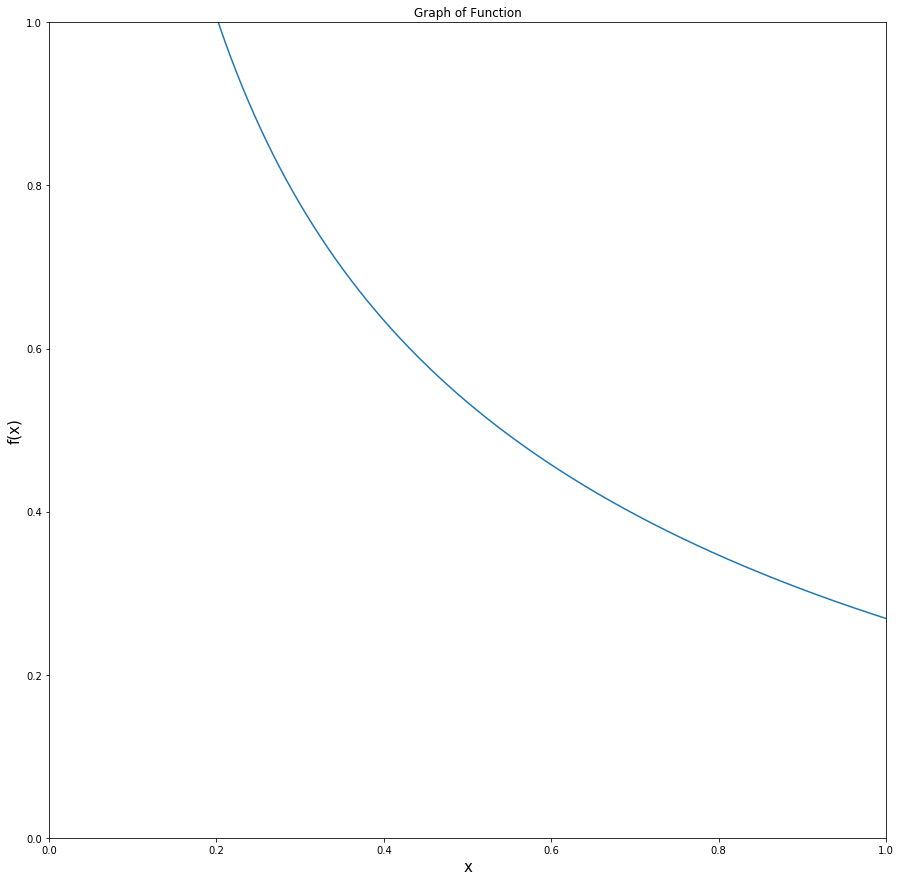

In [9]:
'''
We first graph the function to determine the region that we are looking at.
'''
x = np.linspace(0.0001,1,1000)
y = f(x)

plt.figure(figsize=(15,15))
plt.title('Graph of Function')
plt.axis([0,1,0,1])
plt.xlabel('x', size = 15)
plt.ylabel('f(x)', size = 15)
plt.plot(x,y)
plt.show()

We can form a probability distribution using the weighted function $w(x) = x^{-\frac{1}{2}}$ by normalizing it on the interval we are looking at.
So $p(x) = \frac{x^{-\frac{1}{2}}}{\int_0^1{x^{-\frac{1}{2}}}dx} = \frac{1}{2}x^{-\frac{1}{2}}$. The cumulative distribution function is $F(x)=\int_0^x{\frac{1}{2}y^{-\frac{1}{2}}dy} = x^{\frac{1}{2}}.$ Thus, $x$ should be weighted according to $F^{-1}(x) = x^2.$

In [67]:
'''
This is the algorithm for importance sampling
'''
w = lambda x: x**(-1/2)
const = integrate.quad(w,0,1)[0]
def IS(N):
    ratio = 0
    for i in range(N):
        s = random()
        ratio += (f(s**2)/w(s**2))
    I = ratio*const/N
    return I

In [68]:
print('The value of the integral using importance sampling is %.4f' %IS(1000000))

The value of the integral using importance sampling is 0.8389
